In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd 
                        
from shapely.geometry import box
from pyproj import CRS

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# Definimos la ruta de los archivos
path_d=r"C:\Users\Guillermo\Desktop/Python\01. Continuo urbano-rural"
## BD de continuos poblados por densidad
high=gpd.read_file(path_d+'\\02. Results\\01_Conglomerado_alta_densidad.shp')
medium=gpd.read_file(path_d+'\\02. Results\\02_Conglomerado_media_densidad.shp')
low_ha=gpd.read_file(path_d+'\\02. Results\\03_Conglomerado_baja_densidad.shp')

lim_dep17=gpd.read_file(path_d+'\\01. Dataset\\Límites departamentales.zip') 
lim_dep17=lim_dep17.to_crs("EPSG:32718")

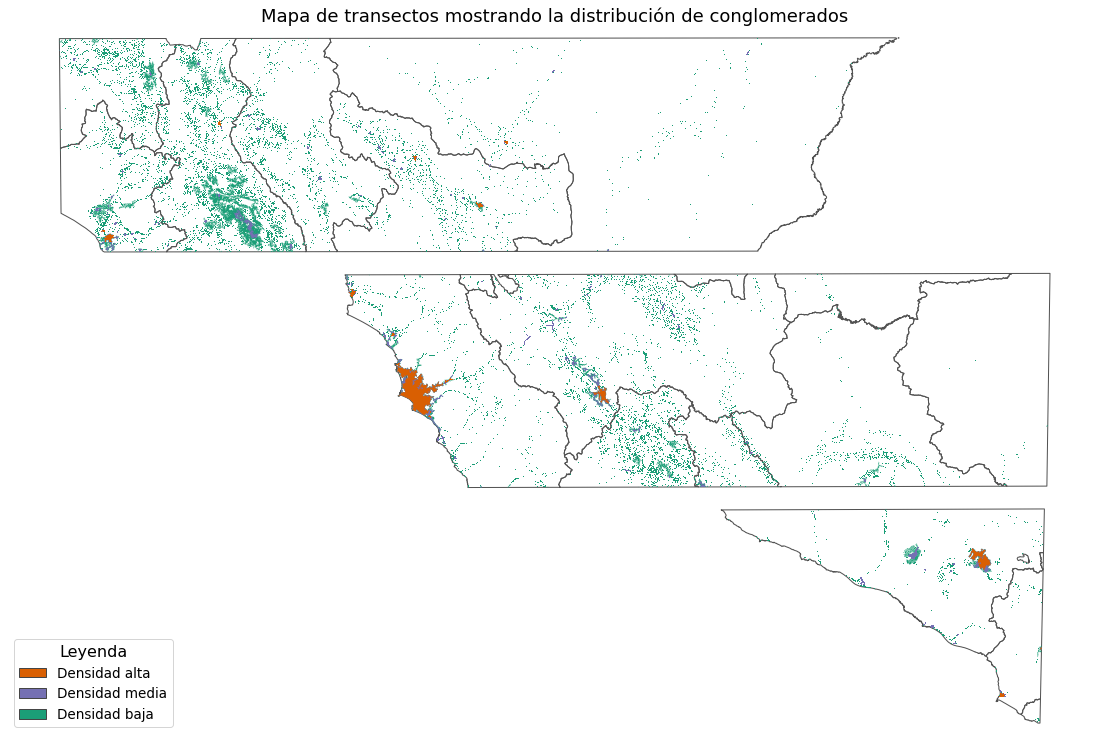

In [238]:
def box_32718(box_coords):
    bb=box(box_coords[0],box_coords[1],box_coords[2],box_coords[3])
    
    box_0=gpd.GeoDataFrame()
    box_0['geometry']=None
    box_0.at[0,'geometry']=bb
    
    box_0.crs = CRS.from_epsg(4326)
    box_0=box_0.to_crs("EPSG:32718")
    return box_0

coord=[[-80.30, -6.90, -70.95,  -4.90],
       [-80.30,-12.90, -70.95, -10.90],
       [-80.30,-17.90, -70.95, -15.90]]

box1=box_32718(coord[0])
box2=box_32718(coord[1])
box3=box_32718(coord[2])

fig, axs=plt.subplots(3,1,sharex=True, figsize=(20, 13))
fig.subplots_adjust(hspace=0)

labels=["Densidad alta", "Densidad media", "Densidad baja" ] ## ciudades
colors=['#d95f02','#7570b3','#1b9e77']


legend_e = [Patch(facecolor=colors[0], edgecolor='#454545', label=labels[0]),
            Patch(facecolor=colors[1], edgecolor='#454545', label=labels[1]),
            Patch(facecolor=colors[2], edgecolor='#454545', label=labels[2])]
axs[2].legend(handles=legend_e, prop={'size': 13.5
                                  }, title="Leyenda", title_fontsize=16, loc='lower left')


for p,q in zip([0,1,2],[box1,box2,box3]):
    lim_dep17.clip(q).plot(ax=axs[p],facecolor='none',edgecolor='#525252')
    low_ha.clip(q).plot(ax=axs[p], facecolor='#1b9e77')
    medium.clip(q).plot(ax=axs[p], facecolor='#7570b3')    
    high.clip(q).plot(ax=axs[p],facecolor='#d95f02')
    axs[p].set_axis_off()
plt.axis('scaled')
    
axs[0].set_title("Mapa de transectos mostrando la distribución de conglomerados",
                 fontsize=18)
plt.savefig(path_d+"\\03. Images\\transectos_pais_2.jpg",dpi=300,bbox_inches='tight')

In [26]:
typo=pd.read_csv(path_d+'\\02. Results\\tipology.csv')

def agg_typology(gdf,df_t,density):
    gdf_f=(gdf.
           set_index("id_n").
           merge(df_t[df_t.density==density].set_index("id_n"), right_index=True, left_index=True, how='outer', validate='1:1'))
    return gdf_f

high=agg_typology(high, typo,"high")
medium=agg_typology(medium, typo,"medium")
low=agg_typology(low_ha, typo,"low")

In [50]:
high.to_file(path_d+'\\02. Results\\01_Conglomerado_alta_densidad_tipo.shp')
medium.to_file(path_d+'\\02. Results\\02_Conglomerado_media_densidad_tipo.shp')
low.to_file(path_d+'\\02. Results\\03_Conglomerado_baja_densidad_tipo.shp')

In [54]:
dep4=lim_dep17[lim_dep17.nombdep=="LORETO"].copy()
dep4

,id,iddpto,nombdep,monto_rcc,tpoblacion,txtpob2017,cx,cy,cz,geometry
15,16,16,LORETO,22.98,883510,"LORETO 883,510",-74.426358,-4.119811,8.0,"POLYGON ((488867.809 9991051.007, 489445.925 9..."


C:\Users\Guillermo\anaconda3\envs\geo1\lib\site-packages\geopandas\plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


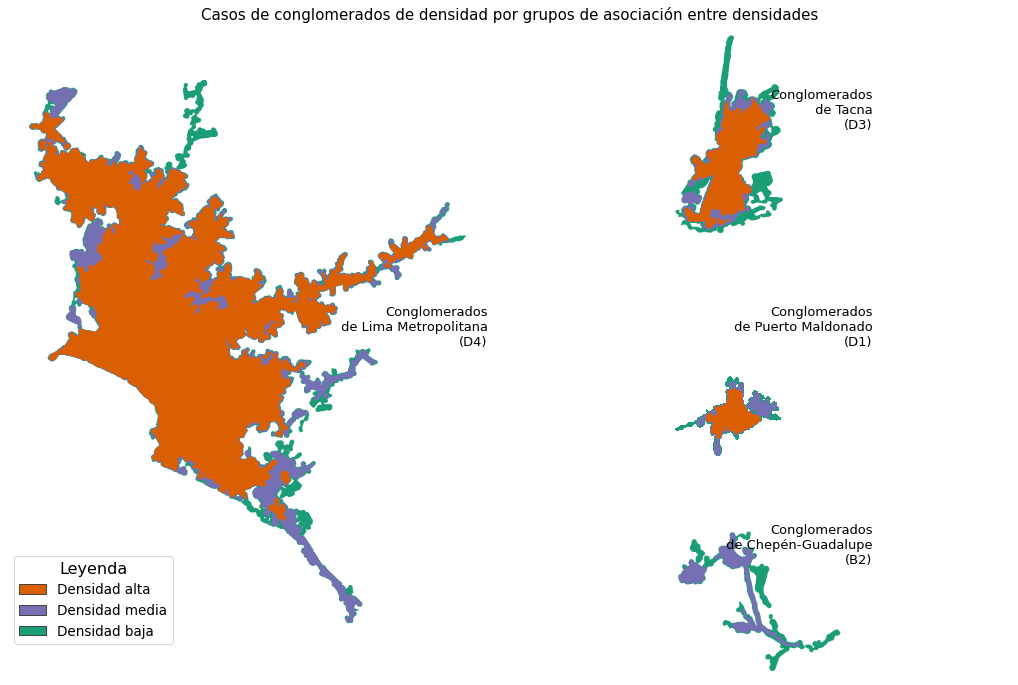

In [245]:
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch

fig, ax=plt.subplots(figsize=(18, 12),sharex=True)
fig.subplots_adjust(hspace=0)

gs = GridSpec(12, 4, figure=fig)
ax1 = fig.add_subplot(gs[0: , 0:2])
ax2 = fig.add_subplot(gs[0:4, 2:4])
ax3 = fig.add_subplot(gs[4:8, 2:4])
ax4 = fig.add_subplot(gs[8:12, 2:4])


dep1=lim_dep17[lim_dep17.nombdep=="LIMA"].copy()
dep2=lim_dep17[lim_dep17.nombdep=="TACNA"].copy()
dep3=lim_dep17[lim_dep17.nombdep=="MADRE DE DIOS"].copy()
dep4=lim_dep17[lim_dep17.nombdep=="LA LIBERTAD"].copy()


l1=low[low.tipology=="D4"].sjoin(dep1, how='inner').plot(ax=ax1,facecolor='#1b9e77')
m1=medium[medium.tipology=="D4"].sjoin(dep1, how='inner').plot(ax=ax1, facecolor='#7570b3',edgecolor='none')    
h1=high[high.tipology=="D4"].sjoin(dep1, how='inner').plot(ax=ax1, facecolor='#d95f02',edgecolor='none')

l1=low[low.tipology=="D3"].sjoin(dep2, how='inner').plot(ax=ax2,facecolor='#1b9e77')
m1=medium[medium.tipology=="D3"].sjoin(dep2, how='inner').plot(ax=ax2, facecolor='#7570b3')    
h1=high[high.tipology=="D3"].sjoin(dep2, how='inner').plot(ax=ax2, facecolor='#d95f02')


l1=low[low.tipology=="D1"].sjoin(dep3, how='inner').plot(ax=ax3,facecolor='#1b9e77')
m1=medium[medium.tipology=="D1"].sjoin(dep3, how='inner').plot(ax=ax3, facecolor='#7570b3')    
h1=high[high.tipology=="D1"].sjoin(dep3, how='inner').plot(ax=ax3, facecolor='#d95f02')

l1=low[low.tipology=="B2"].sjoin(dep4, how='inner').plot(ax=ax4,facecolor='#1b9e77')
m1=medium[medium.tipology=="B2"].sjoin(dep4, how='inner').plot(ax=ax4, facecolor='#7570b3')    
h1=high[high.tipology=="B2"].sjoin(dep4, how='inner').plot(ax=ax4, facecolor='#d95f02')

x1,x2=((ax2.get_xlim()[0]),(ax2.get_xlim()[1]))
y1,y2=((ax2.get_ylim()[0]),(ax2.get_ylim()[1]))
dif1=(x2-x1)
dif2=(y2-y1)

labels=["Densidad alta", "Densidad media", "Densidad baja" ] ## ciudades
colors=['#d95f02','#7570b3','#1b9e77']


legend_e = [Patch(facecolor=colors[0], edgecolor='#454545', label=labels[0]),
            Patch(facecolor=colors[1], edgecolor='#454545', label=labels[1]),
            Patch(facecolor=colors[2], edgecolor='#454545', label=labels[2])]
ax1.legend(handles=legend_e, prop={'size': 13.5
                                  }, title="Leyenda", title_fontsize=16, loc='lower left')



ax2.set_xlim(ax2.get_xlim()[0],ax2.get_xlim()[0]+(dif1+10000))

ax3.set_xlim(ax3.get_xlim()[0],ax3.get_xlim()[0]+(dif1+10000))
ax3.set_ylim(ax3.get_ylim()[0],ax3.get_ylim()[0]+(dif2))

ax4.set_xlim(ax4.get_xlim()[0],ax4.get_xlim()[0]+(dif1+10000))
ax4.set_ylim(ax4.get_ylim()[0],ax4.get_ylim()[0]+(dif2))

for p,q,w in zip([ax1,ax2,ax3, ax4],["Lima Metropolitana", "Tacna","Puerto Maldonado", "Chepén-Guadalupe"],["(D4)","(D3)","(D1)","(B2)"]):
    p.set_axis_off()
    p.set_title("Conglomerados\n de "+q+"\n"+w,y=0.5,loc='right',fontsize=13)

ax.set_axis_off()
ax.set_title("Casos de conglomerados de densidad por grupos de asociación entre densidades", fontsize=15)
plt.savefig(path_d+"\\03. Images\\Casos_tipología_pais_2.jpg",dpi=300,bbox_inches='tight')